In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('delivery_time.csv')
data.head(10)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
df= pd.DataFrame(data)

In [9]:
df.isna()

,DeliveryTime,SortingTime
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [10]:
df.describe()

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DeliveryTime', ylabel='Density'>

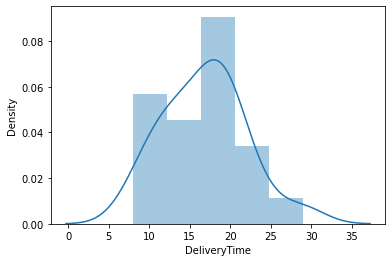

In [11]:
sns.distplot(df['DeliveryTime'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SortingTime', ylabel='Density'>

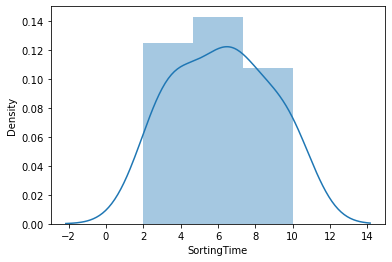

In [12]:
sns.distplot(df['SortingTime'])

Text(0, 0.5, 'SortingTime')

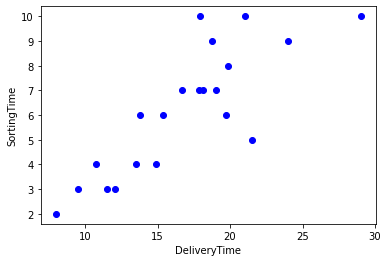

In [15]:
plt.plot(df['DeliveryTime'],df['SortingTime'],"bo")
plt.xlabel("DeliveryTime")
plt.ylabel("SortingTime")

In [16]:
df['SortingTime'].corr(df['DeliveryTime'])

0.8259972607955325

In [18]:
import statsmodels.formula.api as smf
model = smf.ols("SortingTime~DeliveryTime",data=data).fit()
model.params

Intercept      -0.756673
DeliveryTime    0.413744
dtype: float64

<AxesSubplot:xlabel='DeliveryTime', ylabel='SortingTime'>

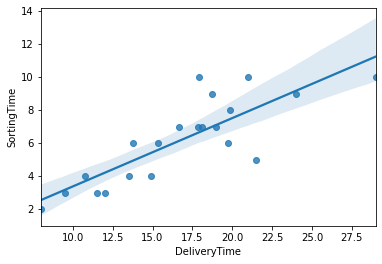

In [19]:
sns.regplot(x="DeliveryTime",y="SortingTime",data=df)

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SortingTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 09 Jun 2021   Prob (F-statistic):           3.98e-06
Time:                        22:26:26   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.7567      1.134     -0.667      0.513      -3.130       1.617
DeliveryTime     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
print(model.conf_int(0.05))

                     0         1
Intercept    -3.130058  1.616712
DeliveryTime  0.278169  0.549318


In [23]:
pred=model.predict(df.iloc[:,0])
pred
pd.set_option("display.max_rows",None)
rmse_lin = np.sqrt(np.mean((np.array(df['SortingTime'])-np.array(pred))**2))
rmse_lin 

1.398343056795723

Text(0, 0.5, 'SortingTime')

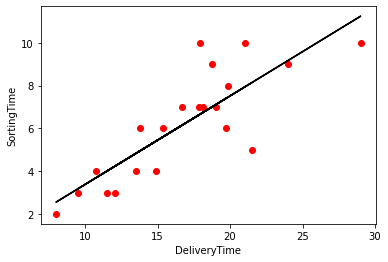

In [24]:
plt.scatter(x=df['DeliveryTime'],y=df['SortingTime'],color='red')
plt.plot(df['DeliveryTime'],pred,color='black')
plt.xlabel('DeliveryTime')
plt.ylabel('SortingTime')

In [25]:
model2 = smf.ols('SortingTime~np.log(DeliveryTime)',data=df).fit()
model2.params
model2.resid 
model2.resid_pearson 

array([ 1.42113829, -0.73549981, -1.13675271,  0.06653685, -0.1293345 ,
        0.07393595, -0.23761321,  0.23930282,  2.18837683,  1.25235279,
        0.27017028,  0.35868204,  0.38795221, -0.67844924, -0.89488241,
       -1.2030258 ,  0.60269965, -0.00716213,  0.35163128,  0.06768673,
       -2.25774594])

In [26]:
pred2 = model2.predict(pd.DataFrame(df['DeliveryTime']))

In [27]:
pred2

0      8.007296
1      5.031310
2      7.593942
3      8.906703
4     10.181351
5      5.896328
6      7.333179
7      2.664452
8      6.931482
9      7.243965
10     7.621170
11     3.497060
12     6.456018
13     3.951314
14     4.254794
15     5.686869
16     5.154901
17     7.010043
18     1.506947
19     6.905090
20     8.165786
dtype: float64

In [28]:
rmse_log = np.sqrt(np.mean((np.array(df['SortingTime'])-np.array(pred2))**2))
rmse_log 

1.3337477286899515

In [29]:
pred2.corr(df.SortingTime)

0.843177263722415

Text(0, 0.5, 'SortingTime')

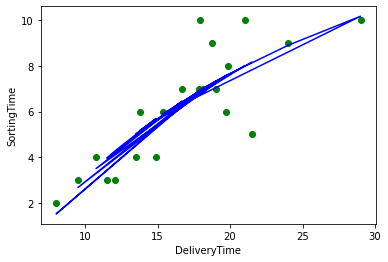

In [30]:
plt.scatter(x=df['DeliveryTime'],y=df['SortingTime'],color='green')
plt.plot(df['DeliveryTime'],pred2,color='blue')
plt.xlabel('DeliveryTime')
plt.ylabel('SortingTime')

In [31]:
model3 = smf.ols('np.log(SortingTime)~DeliveryTime',data=df).fit()
model3.params
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log(SortingTime)   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.679
Method:                  Least Squares   F-statistic:                     43.39
Date:                 Wed, 09 Jun 2021   Prob (F-statistic):           2.64e-06
Time:                         22:31:14   Log-Likelihood:               -0.85600
No. Observations:                   21   AIC:                             5.712
Df Residuals:                       19   BIC:                             7.801
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4372      0.204      2.139      0.046       0.009       0.865
DeliveryTime     0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
pred_log = model3.predict(pd.DataFrame(df['DeliveryTime']))
pred_log

0     2.052148
1     1.475394
2     1.956022
3     2.282850
4     2.667352
5     1.617660
6     1.898347
7     1.167792
8     1.813756
9     1.879122
10    1.962174
11    1.263917
12    1.719938
13    1.321593
14    1.362350
15    1.581517
16    1.494619
17    1.829905
18    1.052441
19    1.808373
20    2.090598
dtype: float64

In [34]:
pred3=np.exp(pred_log)  # as we have used log(SortingTime) in preparing model so we need to convert it back
pred3 

0      7.784605
1      4.372758
2      7.071145
3      9.804581
4     14.401789
5      5.041280
6      6.674852
7      3.214886
8      6.133444
9      6.547752
10     7.114781
11     3.539259
12     5.584181
13     3.749389
14     3.905361
15     4.862325
16     4.457638
17     6.233298
18     2.864635
19     6.100516
20     8.089754
dtype: float64

In [35]:
rmse_exp = np.sqrt(np.mean((np.array(df['SortingTime'])-np.array(pred3))**2))
rmse_exp  

1.7921450016869793

In [36]:
pred3.corr(df.SortingTime)

0.7472768828616798

Text(0, 0.5, 'SortingTime')

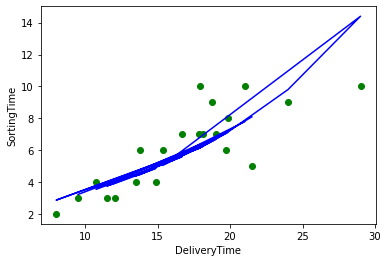

In [37]:
plt.scatter(x=df['DeliveryTime'],y=df['SortingTime'],color='green')
plt.plot(df['DeliveryTime'],pred3,color='blue')
plt.xlabel('DeliveryTime')
plt.ylabel('SortingTime')

In [38]:
student_resid = model3.resid_pearson 
student_resid 

array([ 0.94514898, -0.33626175, -0.61992804, -0.32314918, -1.3766316 ,
        0.65705128,  0.17950335, -0.26108323,  1.84483896,  1.20051932,
        0.44256592,  0.46185032,  0.85281972, -0.84152838, -0.99534634,
       -0.7367689 ,  1.12140739,  0.43780144, -1.35597416,  0.51906376,
       -1.81589886])

Text(0, 0.5, 'Standardized Residual')

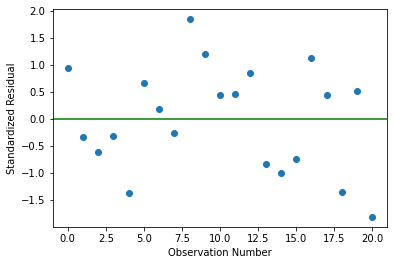

In [39]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

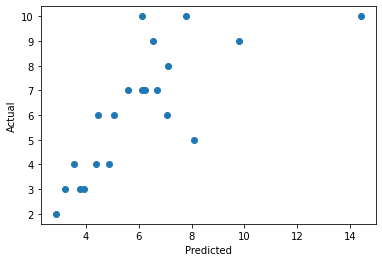

In [40]:
plt.scatter(x=pred3,y=df.SortingTime)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [41]:
df["DeliveryTime_Sq"] = df.DeliveryTime*df.DeliveryTime
df 

,DeliveryTime,SortingTime,DeliveryTime_Sq
0,21.00,10,441.0000
1,13.50,4,182.2500
2,19.75,6,390.0625
3,24.00,9,576.0000
4,29.00,10,841.0000
5,15.35,6,235.6225
6,19.00,7,361.0000
7,9.50,3,90.2500
8,17.90,10,320.4100
9,18.75,9,351.5625


In [42]:
model_quad = smf.ols("np.log(SortingTime)~DeliveryTime+DeliveryTime_Sq",data=df).fit()
model_quad.params

Intercept         -0.778048
DeliveryTime       0.227222
DeliveryTime_Sq   -0.004271
dtype: float64

In [43]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log(SortingTime)   R-squared:                       0.794
Model:                             OLS   Adj. R-squared:                  0.771
Method:                  Least Squares   F-statistic:                     34.62
Date:                 Wed, 09 Jun 2021   Prob (F-statistic):           6.77e-07
Time:                         22:34:10   Log-Likelihood:                 3.2337
No. Observations:                   21   AIC:                           -0.4673
Df Residuals:                       18   BIC:                             2.666
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.7780      0.450     -1.730      0.101      -1.723       0.167
DeliveryTime        0.2272      0.052      4.346      0.000       0.117       0.337
DeliveryTime_Sq    -0.0043      0.001     -2.928      0.009      -0.007      -0.001
==============================================================================
Omnibus:                        1.853   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                0.957
Skew:                          -0.521   Prob(JB):                        0.620
Kurtosis:                       3.100   Cond. No.                     3.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
pred_quad = model_quad.predict(df)
pred4=np.exp(pred_quad)  # as we have used log(SortingTime) in preparing model so we need to convert it back
pred4
rmse_quad = np.sqrt(np.mean((np.array(df['SortingTime'])-np.array(pred4))**2))
rmse_quad  

1.347141980025573

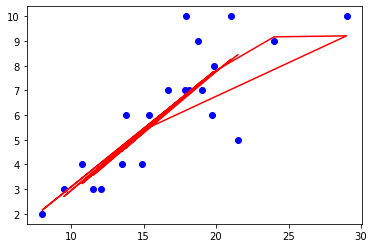

In [45]:
plt.scatter(df.DeliveryTime,df.SortingTime,c="b")
plt.plot(df.DeliveryTime,pred4,"r") 

Text(0, 0.5, 'Standardized Residual')

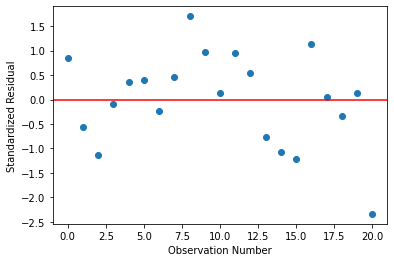

In [46]:
plt.scatter(np.arange(21),model_quad.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

In [47]:
data1 = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model_quad.rsquared])}
table=pd.DataFrame(data)
table 


,DeliveryTime,SortingTime,DeliveryTime_Sq
0,21.00,10,441.0000
1,13.50,4,182.2500
2,19.75,6,390.0625
3,24.00,9,576.0000
4,29.00,10,841.0000
5,15.35,6,235.6225
6,19.00,7,361.0000
7,9.50,3,90.2500
8,17.90,10,320.4100
9,18.75,9,351.5625


(array([1., 0., 1., 3., 2., 3., 5., 2., 3., 1.]),
 array([-2.33754663, -1.93344817, -1.52934971, -1.12525125, -0.72115278,
        -0.31705432,  0.08704414,  0.4911426 ,  0.89524106,  1.29933953,
         1.70343799]),
 <BarContainer object of 10 artists>)

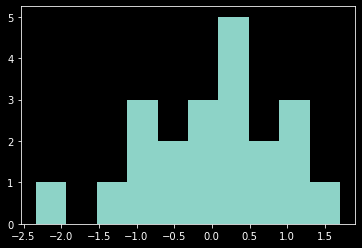

In [50]:
plt.style.use('dark_background')  
plt.hist(model_quad.resid_pearson) 


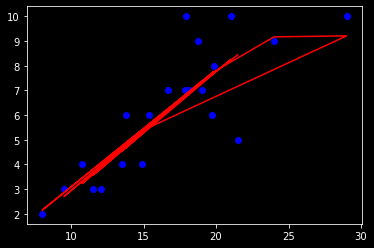

In [51]:
plt.scatter(df.DeliveryTime,df.SortingTime,c="b")
plt.plot(df.DeliveryTime,pred4,"r") 